In [164]:
tick = 'gld'

In [165]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

#retrieve data function
def fetchdata(tick):
    stockdata = pdr.get_data_yahoo(tick)
    return stockdata

stockdata = fetchdata(tick)

# add day index for future analysis
def transdata(stockdata):
    day = np.arange(1, len(stockdata)+1)
    stockdata['day'] = day
    del stockdata['Adj Close']
    del stockdata['Volume']
    stockdata = stockdata [['day','Open','High','Low','Close']]
    return day
    return stockdata

transdata(stockdata)

#calculate the moving average 
stockdata['9-day'] = stockdata['Close'].rolling(9).mean().shift()
stockdata['21-day'] = stockdata['Close'].rolling(21).mean().shift()
stockdata[0:20]

#add "signal" columns
stockdata['signal'] = np.where(stockdata['9-day']>stockdata['21-day'],1,0)
stockdata['signal'] = np.where(stockdata['9-day']<stockdata['21-day'],-1,stockdata['signal'])

#add "entry" columns
stockdata['return'] = np.log(stockdata['Close']).diff()
stockdata['system_return'] = stockdata['signal']*stockdata['return']
stockdata['entry'] = stockdata.signal.diff()


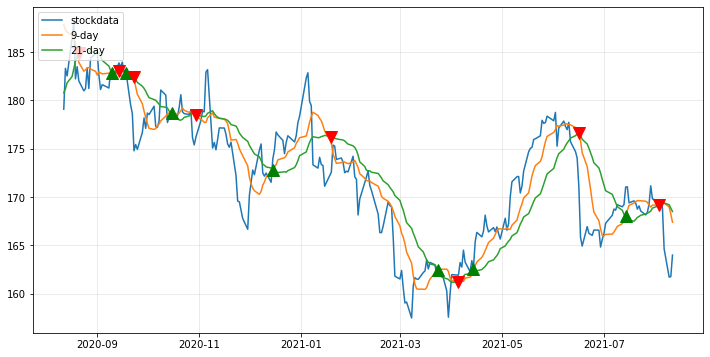

In [166]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(stockdata.iloc[-252:]['Close'], label = 'stockdata')
plt.plot(stockdata.iloc[-252:]['9-day'], label = '9-day')
plt.plot(stockdata.iloc[-252:]['21-day'], label = '21-day')
plt.plot(stockdata[-252:].loc[stockdata.entry == 2].index, stockdata[-252:]['9-day'][stockdata.entry == 2], '^', color = 'g', markersize = 12)
plt.plot(stockdata[-252:].loc[stockdata.entry ==-2].index, stockdata[-252:]['21-day'][stockdata.entry == -2], 'v', color = 'r', markersize = 12)
plt.legend(loc=2);

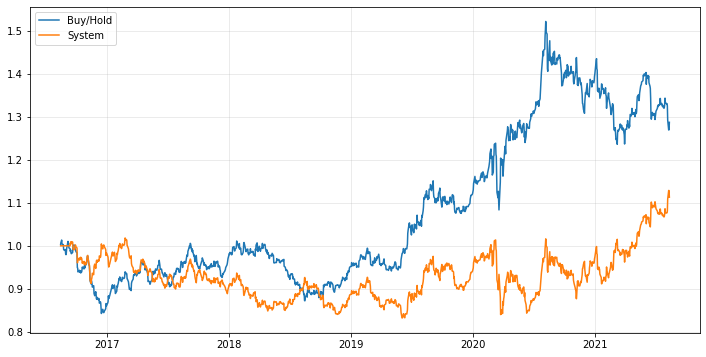

In [167]:
plt.plot(np.exp(stockdata['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(stockdata['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [168]:
np.exp(stockdata['return']).cumprod()[-1] -1

0.2872841290091068

In [169]:
np.exp(stockdata['system_return']).cumprod()[-1] -1

0.11312338853650084